<a href="https://colab.research.google.com/github/j28302830/Senior_Project/blob/main/recognition/LSTM_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np 
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/merge_labeled.csv')

#### label coding for nominal values
def label_coding(label):
    dataset[label]= label_encoder.fit_transform(dataset[label]) 
    dataset[label].unique()
    
### label encoding
label_encoder = preprocessing.LabelEncoder() 
label_coding('Flow ID')
label_coding('Src IP')
label_coding('Dst IP')
label_coding('Timestamp')
label_coding('Label')

### extracting features
X=dataset.iloc[:,:-1]
X=X.values

print("+-inf",sum(np.isinf(X)))
print("inf",sum(np.isposinf(X)))
print("-inf",sum(np.isneginf(X)))
print("nan",sum(np.isnan(X)))
print("fin",sum(np.isfinite(X)))

X = np.where(np.isnan(X), 0, X)
X = np.where(np.isposinf(X), 0, X)
X = np.where(np.isneginf(X), 0, X)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Y = dataset['Label'].values

+-inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
-inf [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
nan [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
fin [41505 41505 41505 41505 41505 41505 41505 41

In [ ]:
zero = [0] * 38 
Y1 = []

X1 = np.reshape(X, (X.shape[0], 83, 1))

print(Y)
for i, l in enumerate(Y):
  zero = [0] * 38 
  zero[l] = 1
  Y1.append(zero)
Y1 = np.array(Y1)

print(X1.shape)
print(Y1.shape)

[15 15 15 ... 37 37 37]
(41505, 83, 1)
(41505, 38)


In [ ]:
model = Sequential()
InputLayer = Input( batch_input_shape=(None, 83, 1), name="lstm_input", dtype=tf.float32, sparse=False, ragged=False)
model.add(InputLayer)
model.add(LSTM(64, batch_input_shape=(None, 83, 1), name="lstm", dtype=tf.float32, return_sequences=True))
model.add(LSTM(38, name="lstm_1", dtype=tf.float32, activation="sigmoid"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 83, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 38)                15656     
                                                                 
Total params: 32,552
Trainable params: 32,552
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3, random_state=123)
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.05)

Epoch 1/100
863/863 [==============================] - 72s 77ms/step - loss: 2.9970 - sparse_categorical_accuracy: 0.1406 - val_loss: 2.9686 - val_sparse_categorical_accuracy: 0.1335
Epoch 2/100
863/863 [==============================] - 66s 76ms/step - loss: 2.9530 - sparse_categorical_accuracy: 0.1659 - val_loss: 2.9523 - val_sparse_categorical_accuracy: 0.1583
Epoch 3/100
863/863 [==============================] - 60s 70ms/step - loss: 2.9366 - sparse_categorical_accuracy: 0.1761 - val_loss: 2.9316 - val_sparse_categorical_accuracy: 0.1893
Epoch 4/100
863/863 [==============================] - 62s 72ms/step - loss: 2.8957 - sparse_categorical_accuracy: 0.1812 - val_loss: 2.8810 - val_sparse_categorical_accuracy: 0.1975
Epoch 5/100
863/863 [==============================] - 60s 70ms/step - loss: 2.8357 - sparse_categorical_accuracy: 0.2039 - val_loss: 2.8553 - val_sparse_categorical_accuracy: 0.1982
Epoch 6/100
863/863 [==============================] - 61s 70ms/step - loss: 2.7787 -

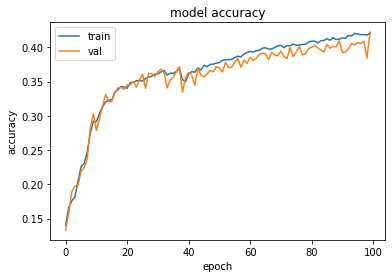

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

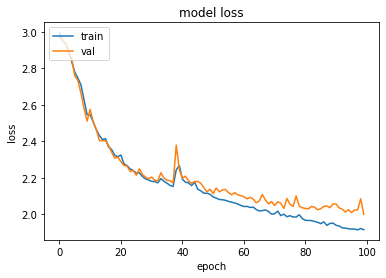

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

390/390 [==============================] - 8s 20ms/step - loss: 2.0145 - sparse_categorical_accuracy: 0.4107


[2.0144941806793213, 0.4106970727443695]

In [ ]:
y_pred = model.predict(X_test)
y_true = Y_test

In [ ]:
print(y_true)

[11 16 18 ... 16 17  0]


In [ ]:
pred = []
for i in y_pred:
  pred.append(np.argmax(i))
print(pred)

[17, 17, 18, 32, 4, 32, 18, 32, 1, 32, 1, 18, 18, 23, 32, 11, 24, 11, 18, 32, 18, 11, 18, 32, 30, 23, 18, 18, 32, 11, 4, 18, 32, 32, 17, 4, 4, 32, 32, 32, 1, 27, 0, 11, 11, 11, 11, 4, 32, 18, 11, 18, 18, 32, 32, 4, 4, 11, 4, 4, 4, 15, 4, 4, 32, 32, 4, 4, 11, 4, 17, 23, 4, 11, 11, 32, 4, 4, 4, 32, 0, 32, 11, 32, 11, 11, 18, 32, 32, 4, 4, 32, 32, 11, 4, 3, 18, 4, 32, 17, 32, 4, 4, 4, 4, 11, 11, 4, 32, 2, 4, 4, 4, 5, 4, 18, 4, 18, 4, 11, 32, 11, 32, 4, 17, 11, 4, 32, 4, 32, 18, 0, 4, 4, 4, 4, 4, 15, 11, 27, 18, 32, 32, 18, 11, 11, 11, 11, 18, 23, 4, 4, 11, 18, 32, 32, 32, 4, 18, 23, 4, 11, 5, 32, 32, 4, 8, 18, 36, 4, 32, 4, 32, 11, 18, 18, 4, 4, 11, 11, 4, 32, 32, 17, 4, 32, 32, 11, 32, 2, 2, 15, 11, 4, 32, 18, 18, 4, 4, 18, 32, 24, 4, 4, 11, 4, 32, 35, 11, 35, 4, 4, 36, 11, 4, 32, 4, 32, 4, 4, 32, 11, 18, 32, 11, 32, 4, 4, 4, 18, 0, 4, 4, 4, 18, 32, 4, 4, 18, 32, 4, 18, 23, 32, 18, 11, 11, 2, 11, 4, 35, 11, 18, 18, 4, 0, 4, 18, 32, 11, 24, 18, 18, 11, 18, 11, 11, 18, 1, 4, 4, 4, 4, 9, 17

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.57      0.32      0.41       299
           1       0.25      0.24      0.25       117
           2       0.34      0.33      0.33       248
           3       0.82      0.52      0.63        62
           4       0.26      0.68      0.37      1418
           5       0.94      0.29      0.44       298
           6       0.10      0.01      0.02       120
           7       0.00      0.00      0.00       128
           8       0.14      0.02      0.04       128
           9       0.29      0.01      0.02       344
          10       0.00      0.00      0.00        67
          11       0.40      0.49      0.44      1781
          12       0.29      0.03      0.05        72
          13       0.50      0.05      0.10       112
          14       0.71      0.04      0.07       134
          15       0.34      0.10      0.16       115
          16       0.38      0.01      0.02       240
          17       0.30    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


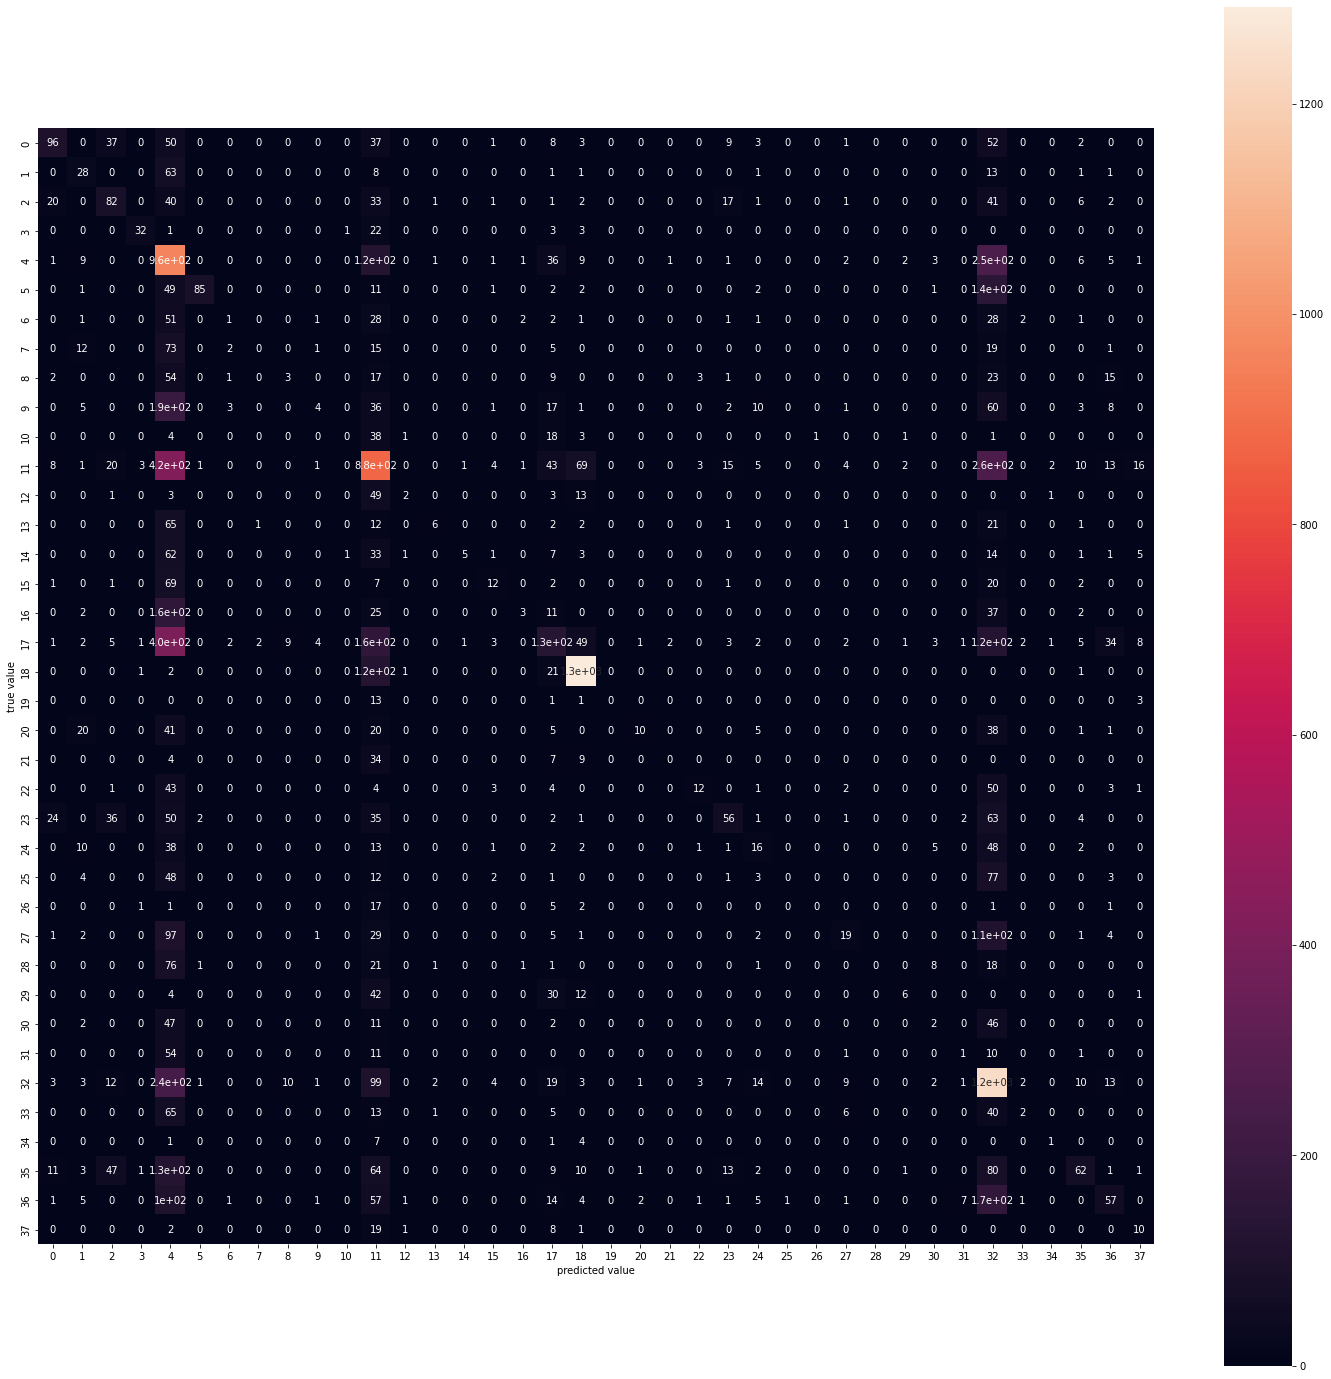

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(25, 25))
mat = confusion_matrix(y_true, pred)
sns.heatmap(mat,square= True, annot=True, cbar= True, ax=ax)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()